<a href="https://colab.research.google.com/github/dcovarru/Python/blob/master/Application_Investments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generation of Investment Data with Python
## Author: Daniel Covarrubias

In [ ]:
########################
#
# 1) Identify Symbols form API dumbstock
# 2) Pull daily Price Data for last 365 days via Yahoo
# 3) Identify Metric(s)
# 4) Identify correlations/significance
# 5) Build Historical Model on Training Set
# 6) Test Model on recent data
# 7) Use TF or sklearn
# 8) Build App on AWS or GCP to monitor realtime data
#
########################

In [ ]:
########################
# Load packages 
########################

import pandas as pd
import datetime
import numpy as np
import pandas_datareader
import pandas_datareader.data as web
from pandas_datareader.data import get_quote_yahoo
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import os
import re
import plotly.figure_factory as ff
import plotly as py
import plotly.offline as offline
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive
import io

import seaborn as sns
%matplotlib inline


In [ ]:
import seaborn as sns

In [ ]:
########################
# Get Ticker Data 
########################

investData = pd.read_csv('https://dumbstockapi.com/stock?format=csv&countries=US')

In [ ]:
investData[investData['ticker'] == 'ASAN']

,ticker,name,is_etf,exchange


In [ ]:
# pd.DataFrame(investData).shape
## investData.shape
## investDataSubset = investData.ticker.loc[33:100]
# list(investDataSubset)
## investDataSubsetDF = pd.DataFrame(investDataSubset)
# str(investDataSubset.loc[0])
## investDataSubsetDF.columns.str.strip()
# investDataSubsetDF
investData = investData[investData.exchange == 'NYSE']

In [ ]:
investData['exchange'].value_counts()

NYSE    3127
Name: exchange, dtype: int64

In [ ]:
investData[investData.exchange == 'NYSE']

,ticker,name,is_etf,exchange
0,A,"Agilent Technologies, Inc.",NaN,NYSE
1,AA,Alcoa Corporation,NaN,NYSE
3,AAC,"AAC Holdings, Inc.",NaN,NYSE
7,AAN,"Aaron&#39;s, Inc.",NaN,NYSE
10,AAP,Advance Auto Parts Inc,NaN,NYSE
...,...,...,...,...
6964,ZTO,ZTO Express (Cayman) Inc.,NaN,NYSE
6965,ZTR,Virtus Global Dividend & Income Fund Inc.,NaN,NYSE
6966,ZTS,Zoetis Inc.,NaN,NYSE
6968,ZUO,"Zuora, Inc.",NaN,NYSE


In [ ]:
######################################
# Python program to check if a string contains
# any special characters or not
# import required package
######################################

import re 
  
# Function checks if the input string(test)
# contains any special character or not
def check_splcharacter(test): 
  
    # Make an RE character set and pass  
    # this as an argument in compile function
 
    string_check= re.compile('[@_!#$%^&*()<>?/\|}{~:]') 
      
    # Pass the string in search function  
    # of RE object (string_check).
    # print(test.ticker) 
    # NOTE: the below code relies on extracting text from the ticker attribute
    if(string_check.search(test.ticker) == None): 
        #print(str(test))
        return("noSC")
          
    else:
        #print(str(test)) 
        return("SC") 


In [ ]:
investData['SCFlag'] = investData.apply(check_splcharacter, axis = 1)
# investDataSubsetDF.apply(check_splcharacter, axis = 1)
## check_splcharacter(investDataSubset[33])
## investData[investData.SCFlag == 'noSC'].shape
investData = investData[investData.SCFlag == 'noSC']

In [ ]:
# investData['ticker' == 'ASAN']

#Get Data for A single Ticker


In [ ]:
######################################
# need to address instances where ticker does not exist 
######################################

# get_data_yahoo() now treats 'null' strings as missing values (GH342)

# start = datetime.datetime(2020, 1, 1)
# end = datetime.datetime(2020, 5, 30)

def get_data(ticker):
    try:
        df = pd.DataFrame()
        # df = pandas_datareader.data.DataReader('%s' % (ticker), 'morningstar', start, end, retry_count=0)
        # df = web.get_quote_av(ticker, api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
        ## df = get_quote_yahoo(ticker)
        df = web.get_data_yahoo(ticker, start="2020-01-01")
        df = df.assign(Stock = ticker)
        # print(df)
    except:
        pass
        
    return df

# get_data('TSLA') #valid Symbol
# get_data('yyfy') #not a valid Symbol
## get_data('A11s1APL') #valid Symbol
# get_data('QQQQ') #not a valid Symbol

In [ ]:
get_data('ASAN')
#valid Symbol

,High,Low,Open,Close,Volume,Adj Close,Stock
Date,,,,,,,
2020-09-30,29.959999,26.750000,27.000000,28.799999,40612400,28.799999,ASAN
2020-10-01,27.440001,25.799999,27.260000,26.129999,12996100,26.129999,ASAN
2020-10-02,26.000000,24.940001,24.940001,25.910000,3490800,25.910000,ASAN
2020-10-05,25.840000,25.000000,25.719999,25.190001,2150400,25.190001,ASAN
2020-10-06,26.690001,24.700001,25.110001,26.000000,6900800,26.000000,ASAN
2020-10-07,26.570000,25.010000,25.750000,26.480000,3760900,26.480000,ASAN
2020-10-08,27.160000,26.059999,26.250000,26.530001,2303900,26.530001,ASAN
2020-10-09,26.490000,25.540001,26.030001,25.700001,1473400,25.700001,ASAN
2020-10-12,25.889999,24.379999,25.709999,24.879999,3142000,24.879999,ASAN


In [ ]:
# df.index.name = 'newDate'
# outDF3.reset_index(inplace=True)
# outDF3

In [ ]:
## get_quote_yahoo('ZOM')
# investData.ticker[0:10]
investData.reset_index(inplace=True)
investData.ticker[0:10]

0       A
1      AA
2     AAC
3     AAN
4     AAP
5     AAT
6      AB
7     ABB
8    ABBV
9     ABC
Name: ticker, dtype: object

In [ ]:
# investData = investData.head(30)

In [ ]:
# investData



# Get All Data

In [ ]:
#########################
# Get Current Prices
# Note that if a Ticker does not have a price, the FOR LOOP will break due to lack of missing Date/PRICE element
#########################

outDF = []

for x in investData.ticker:  
    # print(get_quote_yahoo(x).price)
    # print(ticker)
    outDF.append(get_data(x))
    # print(x)
    # print(tmp)
    # dfTickerPrice = get_quote_yahoo(x).price
    # calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

In [ ]:
# outDF.remove(outDF[2])
## pd.concat(outDF[1:10])
#for ele in outDF: 
#    if len(ele) == 0: 
#        outDF.remove(ele)
#print(outDF)
outDF

[                  High         Low        Open  ...     Volume   Adj Close  Stock
 Date                                            ...                              
 2020-01-02   86.349998   85.199997   85.900002  ...  1410500.0   85.398193      A
 2020-01-03   85.330002   84.500000   84.669998  ...  1118300.0   84.027046      A
 2020-01-06   84.820000   83.599998   84.000000  ...  1993200.0   84.275452      A
 2020-01-07   85.260002   83.940002   83.959999  ...  1684700.0   84.533775      A
 2020-01-08   86.470001   85.199997   85.959999  ...  1847600.0   85.368385      A
 ...                ...         ...         ...  ...        ...         ...    ...
 2020-12-14  120.239998  116.739998  118.610001  ...  1395200.0  116.739998      A
 2020-12-15  118.040001  116.849998  117.300003  ...  1973800.0  117.389999      A
 2020-12-16  117.739998  116.400002  117.580002  ...  1698600.0  117.239998      A
 2020-12-17  119.389999  117.040001  118.050003  ...  2166700.0  118.970001      A
 202

In [ ]:
#len(outDF)
#filter(None, outDF)
outDF2 = pd.concat(outDF)
# outDF.remove(outDF[19])

In [ ]:
# df['add'] = df.apply(np.sum, axis = 1)
outDF2.head

<bound method NDFrame.head of                  High        Low       Open  ...     Volume  Adj Close  Stock
Date                                         ...                             
2020-01-02  86.349998  85.199997  85.900002  ...  1410500.0  85.398193      A
2020-01-03  85.330002  84.500000  84.669998  ...  1118300.0  84.027046      A
2020-01-06  84.820000  83.599998  84.000000  ...  1993200.0  84.275452      A
2020-01-07  85.260002  83.940002  83.959999  ...  1684700.0  84.533775      A
2020-01-08  86.470001  85.199997  85.959999  ...  1847600.0  85.368385      A
...               ...        ...        ...  ...        ...        ...    ...
2020-12-14  53.430000  51.040001  51.849998  ...   377100.0  51.520000   ZYME
2020-12-15  52.200001  51.000000  52.040001  ...   203800.0  51.509998   ZYME
2020-12-16  51.790001  50.119999  51.700001  ...   266900.0  51.330002   ZYME
2020-12-17  52.060001  50.310001  51.340000  ...   309900.0  51.700001   ZYME
2020-12-18  52.750000  51.200001  

In [ ]:
outDF2.index.name = 'newDate'
outDF2.reset_index(inplace=True)
outDF2.shape

(586569, 8)

In [ ]:
outDF2

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.398193,A
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.027046,A
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.275452,A
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.533775,A
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.368385,A
...,...,...,...,...,...,...,...,...
586564,2020-12-14,53.430000,51.040001,51.849998,51.520000,377100.0,51.520000,ZYME
586565,2020-12-15,52.200001,51.000000,52.040001,51.509998,203800.0,51.509998,ZYME
586566,2020-12-16,51.790001,50.119999,51.700001,51.330002,266900.0,51.330002,ZYME
586567,2020-12-17,52.060001,50.310001,51.340000,51.700001,309900.0,51.700001,ZYME


In [ ]:
# outDF2[outDF2.ticker == 'TSLA']

# plt.hist(float(outDF2[outDF2.price < 5]))
###################################
# This used to work
###################################
# fig = px.box(outDF2."price", y="Adj Close", points = "all")
# fig.show()

# Export Data


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
outDF2.to_csv('outDF2_20201218.csv')
!cp outDF2_20201218.csv "drive/My Drive/"
  # drive.flush_and_unmount()

  # After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
##!ls "/content/drive/My Drive"

In [ ]:
drive.flush_and_unmount()

In [ ]:
##############################################
# connect with StockTwits #
##############################################

# https://api.stocktwits.com/api/2/streams/symbol/A.json

# import json

# with open('https://api.stocktwits.com/api/2/streams/symbol/A.json') as f:
#   data = json.load(f)

# person_dict = {'name': 'Bob',
# 'age': 12,
# 'children': None
# }
# person_json = json.dumps(person_dict)

# Output: {"name": "Bob", "age": 12, "children": null}
# print(person_json)

import urllib, json, urllib.request

# url = "https://api.stocktwits.com/api/2/streams/symbol/A.json"

# response = urllib.request.urlopen(url)
# data = json.loads(response.read())
# print(data)

In [ ]:
##############################################
# read in historical data previously created #
##############################################
drive.mount('/content/drive')
outDF2 = pd.read_csv("drive/My Drive/outDF2_20201218.csv", index_col=0)
# df=pd.read_csv('gdrive/My Drive/data.csv')
# Preview the first 5 lines of the loaded data 
# drive.flush_and_unmount()
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
outDF2['Stock'].value_counts()

WELL     245
EVTC     245
CPA      245
TY       245
HLT      245
        ... 
EMP        1
RCA        1
CTEST      1
SCA        1
NTEST      1
Name: Stock, Length: 2422, dtype: int64

In [ ]:
# Below code is framework to pull historical data
outDF2.iloc[:,0:3]
# outDF2.loc['AAL']
outDF2.shape

(586569, 8)

In [ ]:
#################################################
# only run this when needed to rename index
#################################################

# outDF2.index.name = 'ticker'
# outDF2.reset_index(inplace=True)
outDF2

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.398193,A
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.027046,A
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.275452,A
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.533775,A
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.368385,A
...,...,...,...,...,...,...,...,...
586564,2020-12-14,53.430000,51.040001,51.849998,51.520000,377100.0,51.520000,ZYME
586565,2020-12-15,52.200001,51.000000,52.040001,51.509998,203800.0,51.509998,ZYME
586566,2020-12-16,51.790001,50.119999,51.700001,51.330002,266900.0,51.330002,ZYME
586567,2020-12-17,52.060001,50.310001,51.340000,51.700001,309900.0,51.700001,ZYME


In [ ]:
# outDF2.set_index("ticker", inplace=True)  

# Ticker Information



In [ ]:
# https://www.stockmonitor.com/sector/basic-materials/
# https://www.stockmonitor.com/sector/communication-services/
# https://www.stockmonitor.com/sector/consumer-cyclical/
# https://www.stockmonitor.com/sector/energy/
# https://www.stockmonitor.com/sector/financial-services/
# https://www.stockmonitor.com/sector/healthcare/
# https://www.stockmonitor.com/sector/industrials/
# https://www.stockmonitor.com/sector/technology/
# https://www.stockmonitor.com/sector/utilities/

# d = {'col1': [1, 2], 'col2': [3, 4]}

tickerSites = {'sites' : ['https://www.stockmonitor.com/sector/basic-materials/'
,'https://www.stockmonitor.com/sector/communication-services/'
,'https://www.stockmonitor.com/sector/consumer-cyclical/'
,'https://www.stockmonitor.com/sector/energy/'
,'https://www.stockmonitor.com/sector/financial-services/'
,'https://www.stockmonitor.com/sector/healthcare/'
,'https://www.stockmonitor.com/sector/industrials/'
,'https://www.stockmonitor.com/sector/technology/'
,'https://www.stockmonitor.com/sector/utilities/'], 'type' : ['basic-materials'
,'communication-services'
,'consumer-cyclical'
,'energy'
,'financial-services'
,'healthcare'
,'industrials'
,'technology'
,'utilities']
}

In [ ]:
tickerSites_df = pd.DataFrame(tickerSites)

In [ ]:
#########################
# Extract Multiple Series
#########################

df_out = pd.DataFrame()

for i in range(0, tickerSites_df.shape[0]): 
  # print(i)
  dfs = pd.read_html(tickerSites_df['sites'][i], header=0)
  for df in dfs:

    # print(df) 
    df['type'] = tickerSites_df['type'][i]

    # calPerChange = (df.Close - df.Open)/df.Open
    df_out = df_out.append(df)
    
    # df.append(df)
    # pd.concat(df)
    # return siteDF
df_out

# siteDF

,Change%,Company,Company.1,Price,Volume,Low,High,type
0,▼ -0.54%,ASIX,AdvanSix Inc,20.39,376882,20.39,21.27,basic-materials
1,▼ -1.95%,AEM,Agnico Eagle Mines Limited,71.57,932800,71.54,73.28,basic-materials
2,▲ 0.35%,APD,"Air Products and Chemicals, Inc",269.55,2237363,265.32,270.46,basic-materials
3,▼ -5.90%,AGI,Alamos Gold Inc,9.25,7239700,9.24,9.80,basic-materials
4,▲ 1.03%,ALB,Albemarle Corporation,138.90,2447400,137.05,139.29,basic-materials
...,...,...,...,...,...,...,...,...
95,▼ -1.25%,UGI,UGI Corporation,35.54,2719400,35.42,36.42,utilities
96,▼ -0.07%,UTL,Unitil Corporation,42.94,203100,42.74,43.88,utilities
97,▼ -1.56%,VST,Vistra Energy Corp,17.65,5363497,17.58,18.08,utilities
98,▼ -0.98%,WEC,"WEC Energy Group, Inc",91.32,2501500,90.61,92.70,utilities


In [ ]:
#########################################
# Ticker Data and Time Series Data
#########################################

print(df_out.shape, outDF2.shape)

(4791, 8) (586569, 8)


In [ ]:
df_out.head()

,Change%,Stock,Company.1,Price,Volume,Low,High,type
0,▼ -0.54%,ASIX,AdvanSix Inc,20.39,376882,20.39,21.27,basic-materials
1,▼ -1.95%,AEM,Agnico Eagle Mines Limited,71.57,932800,71.54,73.28,basic-materials
2,▲ 0.35%,APD,"Air Products and Chemicals, Inc",269.55,2237363,265.32,270.46,basic-materials
3,▼ -5.90%,AGI,Alamos Gold Inc,9.25,7239700,9.24,9.80,basic-materials
4,▲ 1.03%,ALB,Albemarle Corporation,138.90,2447400,137.05,139.29,basic-materials


In [ ]:
outDF2.head()

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.398193,A
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.027046,A
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.275452,A
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.533775,A
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.368385,A


In [ ]:
df_out[df_out['Stock'] == 'ASAN']

,Change%,Stock,Company.1,Price,Volume,Low,High,type
50,▲ 0.23%,ASAN,Asana Inc. Class A,30.34,2426100,29.94,31.0,technology


In [ ]:
outDF2[outDF2['Stock'] == 'ASAN']

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock


In [ ]:
outDF2['Stock'].value_counts()

WELL     245
EVTC     245
CPA      245
TY       245
HLT      245
        ... 
EMP        1
RCA        1
CTEST      1
SCA        1
NTEST      1
Name: Stock, Length: 2422, dtype: int64

In [ ]:
# Renamed ticker "Company" to "Stock" for Merging

df_out = df_out.rename(columns={"Company": "Stock"})
# list(outDF.columns) 

In [ ]:
outDF2.dtypes

newDate       object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
Stock         object
dtype: object

In [ ]:
df_out.dtypes

Change%       object
Stock         object
Company.1     object
Price        float64
Volume         int64
Low          float64
High         float64
type          object
dtype: object

In [ ]:
df_out2 = outDF2.merge(df_out, how = 'left', on = 'Stock', indicator=True)
# list(dfMerge.columns)
# df_out2.tail()

,newDate,High_x,Low_x,Open,Close,Volume_x,Adj Close,Stock,Change%,Company.1,Price,Volume_y,Low_y,High_y,type,_merge
586564,2020-12-14,53.430000,51.040001,51.849998,51.520000,377100.0,51.520000,ZYME,▼ -0.43%,Zymeworks Inc,51.48,311749.0,51.2,52.75,healthcare,both
586565,2020-12-15,52.200001,51.000000,52.040001,51.509998,203800.0,51.509998,ZYME,▼ -0.43%,Zymeworks Inc,51.48,311749.0,51.2,52.75,healthcare,both
586566,2020-12-16,51.790001,50.119999,51.700001,51.330002,266900.0,51.330002,ZYME,▼ -0.43%,Zymeworks Inc,51.48,311749.0,51.2,52.75,healthcare,both
586567,2020-12-17,52.060001,50.310001,51.340000,51.700001,309900.0,51.700001,ZYME,▼ -0.43%,Zymeworks Inc,51.48,311749.0,51.2,52.75,healthcare,both
586568,2020-12-18,52.750000,51.200001,51.830002,51.480000,312100.0,51.480000,ZYME,▼ -0.43%,Zymeworks Inc,51.48,311749.0,51.2,52.75,healthcare,both


In [ ]:
# ASAN not showing up due to dumbStock API
# TSLA is in NASDAQ
df_out2[df_out2['']]

,newDate,High_x,Low_x,Open,Close,Volume_x,Adj Close,Stock,Change%,Company.1,Price,Volume_y,Low_y,High_y,type,_merge
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.398193,A,▲ 0.28%,"Agilent Technologies, Inc",119.3,3911800.0,118.44,119.86,healthcare,both
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.027046,A,▲ 0.28%,"Agilent Technologies, Inc",119.3,3911800.0,118.44,119.86,healthcare,both
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.275452,A,▲ 0.28%,"Agilent Technologies, Inc",119.3,3911800.0,118.44,119.86,healthcare,both
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.533775,A,▲ 0.28%,"Agilent Technologies, Inc",119.3,3911800.0,118.44,119.86,healthcare,both
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.368385,A,▲ 0.28%,"Agilent Technologies, Inc",119.3,3911800.0,118.44,119.86,healthcare,both


In [ ]:
outDF2.shape

(586569, 8)

In [ ]:
df_out2[df_out2['Stock'] == 'WORK'].tail()

NameError: ignored

In [ ]:
df_out2['type'].value_counts()

financial-services        85250
industrials               70753
consumer-cyclical         56827
energy                    50498
basic-materials           34790
technology                34063
healthcare                27685
communication-services    20089
utilities                 18554
Name: type, dtype: int64

In [ ]:
df_out2_ex = df_out2[df_out2['Stock'] == 'WORK']

In [ ]:
df_out2_ex.dtypes

newDate        object
High_x        float64
Low_x         float64
Open          float64
Close         float64
Volume_x      float64
Adj Close     float64
Stock          object
Change%        object
Company.1      object
Price         float64
Volume_y      float64
Low_y         float64
High_y        float64
type           object
_merge       category
dtype: object

# Time Series Chart


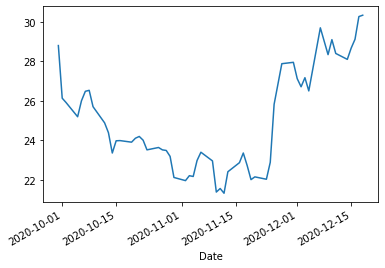

In [ ]:
outDF3['Close'].plot()

# Dictionary to enhance Daily Obs


In [ ]:
## outDF2.loc[['AABA', 'ZYNE']]
pd.DataFrame(outDF2.columns)
# extract only Float64 items 
pd.DataFrame(outDF2.dtypes)=='float64'

outDF3 = outDF2[(outDF2.dtypes=='float64').index[outDF2.dtypes=='float64']]

In [ ]:
### Write out column names ###
### DO NOT RUN UNLESS YOU NEED TO CREATE COLUMNS ###
outDF2_Columns = pd.DataFrame(outDF2.columns)

drive.mount('/content/drive')
outDF2_Columns.to_csv('outDF2_Columns.csv')
!cp outDF2_Columns.csv "drive/My Drive/"
drive.flush_and_unmount()

In [ ]:
# outDF2.dtypes
############################]
# I do not know where this data came from
# I think it comes from Yahoo or AdvantageKey
# I think it is real time data
############################

# outDF2 is all data
# outDF3 is continuous Data for Correlation analysis
outDF3.head()

,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketPrice,regularMarketDayHigh,regularMarketDayLow,regularMarketPreviousClose,bid,ask,regularMarketOpen,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,forwardPE,priceToBook,price
0,0.502517,1.589585e+09,82.00,0.410004,-0.050003,-0.061248,81.59,82.830,81.22,81.64,80.00,81.98,81.51,20.459995,0.334696,-9.050003,-0.099846,61.13,90.64,1.587514e+09,1.590106e+09,1.590106e+09,1.590106e+09,0.672,33.756720,0.008231,2.417,3.57,15.636,76.460590,5.129410,0.067086,79.576200,2.013794,0.025306,22.854342,5.218086,81.59
1,0.150154,1.589587e+09,6.67,0.010000,-0.150000,-2.202645,6.66,6.930,6.62,6.81,6.63,6.67,6.70,1.500000,0.290698,-18.220000,-0.732315,5.16,24.88,1.480032e+09,1.587586e+09,1.594825e+09,1.595261e+09,0.360,NaN,0.052863,-4.567,-0.24,22.994,7.256765,-0.596765,-0.082236,14.536058,-7.876059,-0.541829,-27.750000,0.289641,6.66
2,0.000000,1.589574e+09,31.30,0.000000,-0.780003,-2.431429,31.30,31.790,30.73,32.08,27.77,36.80,31.65,18.289999,1.405842,-47.350002,-0.602034,13.01,78.65,1.586218e+09,1.588849e+09,1.595522e+09,1.595867e+09,0.150,NaN,0.004676,-4.536,3.77,21.564,26.705587,4.594412,0.172039,45.787300,-14.487301,-0.316404,8.302387,1.451493,31.30
3,0.000000,1.589576e+09,126.06,0.000000,4.930000,4.070008,126.06,127.025,118.73,121.13,125.47,130.00,119.91,54.729996,0.767279,-45.369995,-0.264656,71.33,171.43,1.585872e+09,1.589906e+09,1.589906e+09,1.589906e+09,0.240,18.429823,0.001981,6.840,8.54,51.606,112.631770,13.428230,0.119222,135.227300,-9.167297,-0.067792,14.761124,2.442739,126.06
4,0.000000,1.589574e+09,24.38,0.000000,-0.200001,-0.813673,24.38,24.640,23.61,24.58,15.25,24.93,24.41,4.229999,0.209926,-24.880000,-0.505075,20.15,49.26,1.593043e+09,1.588105e+09,1.595948e+09,1.596470e+09,1.160,30.173265,0.047193,0.808,1.35,21.713,26.122942,-1.742943,-0.066721,39.025257,-14.645258,-0.375276,18.059258,1.122830,24.38


In [ ]:
outDF2.shape

(29, 73)

# Quick Analysis

In [ ]:
outDF3.corr()

,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketPrice,regularMarketDayHigh,regularMarketDayLow,regularMarketPreviousClose,bid,ask,regularMarketOpen,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,forwardPE,priceToBook,price
postMarketChangePercent,1.000000,-0.261967,-0.005281,0.587613,-0.497154,-0.862467,-0.009395,-0.009342,0.004935,0.009273,-0.004037,-0.003836,0.003247,-0.027569,-0.202332,0.493384,0.318405,-0.001001,-0.265760,0.457688,-0.017026,-0.180615,-0.172006,-0.368835,-0.541261,0.031740,-0.106767,-0.155991,0.081018,-0.005523,-0.044769,-0.422736,-0.035658,0.119718,0.151205,-0.296457,-0.106999,-0.009395
postMarketTime,-0.261967,1.000000,0.346257,-0.148163,0.152348,0.340957,0.346074,0.350166,0.350886,0.346547,0.359834,0.338675,0.349921,0.258679,-0.202992,-0.227077,0.079675,0.365638,0.397914,0.037393,0.215245,-0.267240,-0.278213,0.302062,0.420309,-0.276589,0.126365,0.312258,-0.132560,0.342838,0.247596,0.149348,0.317130,0.121681,0.154425,-0.214356,-0.032313,0.346074
postMarketPrice,-0.005281,0.346257,1.000000,-0.502746,0.489752,-0.098034,0.999982,0.999964,0.999633,0.999469,0.998522,0.999476,0.999647,0.913997,-0.195204,-0.088508,0.664516,0.984166,0.852735,0.011642,0.541713,-0.514043,-0.540780,0.359027,0.126128,-0.473883,0.688012,0.645508,0.334184,0.997020,0.651199,0.177653,0.975401,0.083011,0.680011,0.334328,0.140418,0.999982
postMarketChange,0.587613,-0.148163,-0.502746,1.000000,-0.371734,-0.199054,-0.507990,-0.504982,-0.502142,-0.503071,-0.497627,-0.506187,-0.503033,-0.425570,0.058415,0.234343,-0.127874,-0.516784,-0.532291,0.334816,-0.251756,-0.080474,-0.064528,-0.382995,-0.230474,0.142286,-0.392711,-0.245077,-0.195279,-0.521088,-0.183989,-0.119935,-0.534776,0.136453,-0.159591,-0.269923,-0.176664,-0.507990
regularMarketChange,-0.497154,0.152348,0.489752,-0.371734,1.000000,0.584590,0.496824,0.495071,0.475438,0.468366,0.499716,0.498872,0.474652,0.513283,0.058778,-0.298931,0.062657,0.463947,0.549800,-0.051246,0.429589,-0.275784,-0.290575,0.029099,0.170187,-0.273962,0.424844,0.349401,0.256008,0.472691,0.556358,0.419426,0.488236,0.008202,0.188685,0.107549,0.149991,0.496824
regularMarketChangePercent,-0.862467,0.340957,-0.098034,-0.199054,0.584590,1.000000,-0.081439,-0.080193,-0.097602,-0.104795,-0.078195,-0.084909,-0.096717,-0.046389,0.253166,-0.473547,-0.371841,-0.092457,0.179620,-0.052346,0.035075,-0.249227,-0.250132,-0.066246,0.554881,-0.353978,-0.026801,0.083519,-0.201407,-0.096154,0.099769,0.519927,-0.076641,-0.016929,-0.165962,0.169988,0.099408,-0.081439
regularMarketPrice,-0.009395,0.346074,0.999982,-0.507990,0.496824,-0.081439,1.000000,0.999941,0.999620,0.999472,0.998516,0.999495,0.999643,0.916101,-0.151229,-0.121505,0.635463,0.984695,0.858758,0.111974,0.546178,-0.214958,-0.235797,0.362510,0.145948,-0.455930,0.679020,0.659405,0.324621,0.997243,0.651223,0.192491,0.976113,0.046858,0.640330,0.226923,0.148518,1.000000
regularMarketDayHigh,-0.009342,0.350166,0.999964,-0.504982,0.495071,-0.080193,0.999941,1.000000,0.999583,0.999477,0.998543,0.999397,0.999641,0.917408,-0.149446,-0.124884,0.634271,0.984045,0.860454,0.114443,0.546692,-0.218555,-0.239434,0.361346,0.148851,-0.457593,0.676787,0.660956,0.326335,0.997073,0.652318,0.194677,0.976174,0.046307,0.641387,0.227960,0.149009,0.999941
regularMarketDayLow,0.004935,0.350886,0.999633,-0.502142,0.475438,-0.097602,0.999620,0.999583,1.000000,0.999886,0.998185,0.998938,0.999967,0.910975,-0.158692,-0.109569,0.645950,0.986398,0.852293,0.114475,0.546037,-0.211408,-0.232305,0.370489,0.1428

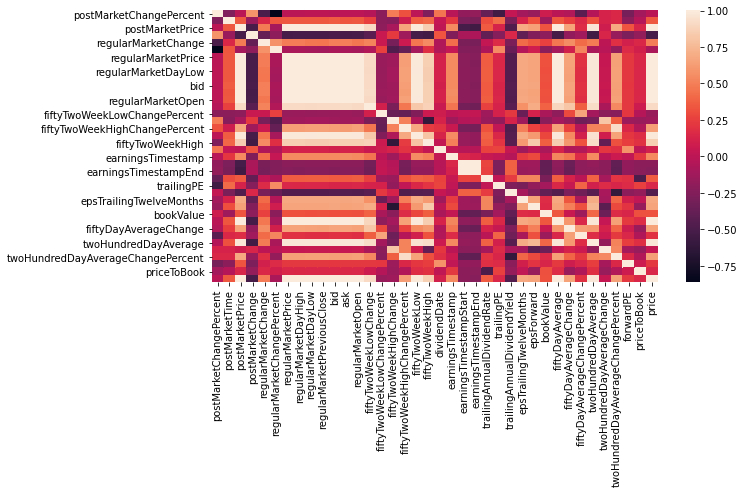

In [ ]:
#############################################
## Add some TensorFlow or Pytorch Analysis ##
#############################################

plt.figure(figsize=(10,5))
sns.heatmap(outDF3.corr())

# sns.pairplot(outDF3)

In [ ]:
## 02/05/2020

#ALPHAVANTAGE_API_KEY = 'ANBKAAOU9YDNYBRV'
#keyValue = os.getenv(ALPHAVANTAGE_API_KEY)
## os.environ['ALPHAVANTAGE_API_KEY'] = 'ANBKAAOU9YDNYBRV'
### get_quote_yahoo('AGRX').price
### get_quote_yahoo('WORK').price
#pd.concat('WORK', web.DataReader('WORK', 'yahoo', '2019-10-01'))
outDF3 = web.DataReader('ASAN', 'yahoo', '2019-06-01')
outDF3 = outDF3.assign(Stock = 'ASAN')
outDF3
# len(get_quote_yahoo(investData.ticker[3]))
## web.get_quote_av(["AAPL"], api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
## web.get_quote_av(["AAPL", "TSLA"])
# os.getcwd()
## os.getenv('ALPHAVANTAGE_API_KEY')
## web.get_sector_performance_av()
# alphaVantage API Key: ANBKAAOU9YDNYBRV
## investDataSubsetDF_clean =  investDataSubsetDF[investDataSubsetDF['SCFlag'] == 'noSC']
## web.DataReader('gs', 'iex-tops')
## web.get_quote_av(["AAPL", "TSLA"])

,High,Low,Open,Close,Volume,Adj Close,Stock
Date,,,,,,,
2020-09-30,29.959999,26.750000,27.000000,28.799999,40612400,28.799999,ASAN
2020-10-01,27.440001,25.799999,27.260000,26.129999,12996100,26.129999,ASAN
2020-10-02,26.000000,24.940001,24.940001,25.910000,3490800,25.910000,ASAN
2020-10-05,25.840000,25.000000,25.719999,25.190001,2150400,25.190001,ASAN
2020-10-06,26.690001,24.700001,25.110001,26.000000,6900800,26.000000,ASAN
2020-10-07,26.570000,25.010000,25.750000,26.480000,3760900,26.480000,ASAN
2020-10-08,27.160000,26.059999,26.250000,26.530001,2303900,26.530001,ASAN
2020-10-09,26.490000,25.540001,26.030001,25.700001,1473400,25.700001,ASAN
2020-10-12,25.889999,24.379999,25.709999,24.879999,3142000,24.879999,ASAN


In [ ]:
 # web.get_quote_av(["AAPL", "TSLA"])

In [ ]:
outDF3.index.name = 'newDate'
outDF3.reset_index(inplace=True)
outDF3

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2019-06-03,186.679993,176.990005,185.509995,178.970001,13064400,178.970001,TSLA
1,2019-06-04,193.979996,179.610001,181.100006,193.600006,13807500,193.600006,TSLA
2,2019-06-05,201.279999,191.850006,198.679993,196.589996,13510800,196.589996,TSLA
3,2019-06-06,211.000000,201.800003,204.440002,205.949997,20242200,205.949997,TSLA
4,2019-06-07,210.839996,203.500000,205.000000,204.500000,16003500,204.500000,TSLA
...,...,...,...,...,...,...,...,...
174,2020-02-10,819.989990,752.400024,800.000000,771.280029,24689200,771.280029,TSLA
175,2020-02-11,783.510010,758.000000,768.789978,774.380005,11697500,774.380005,TSLA
176,2020-02-12,789.750000,763.369995,777.869995,767.289978,12022500,767.289978,TSLA
177,2020-02-13,818.000000,735.000000,741.840027,804.000000,26289300,804.000000,TSLA


In [ ]:
# fig = px.line(outDF2[outDF2.Stock == 'ASAN'], x='newDate', y='High')
# fig.show()

In [ ]:
investDataSubsetDF_clean['ticker'].iloc[13]

In [ ]:
###################################
# Need code to extract tickers with recent data
# and extract tickers with SPECIAL CHARACTERS
# Data as of Today() - 1
###################################

# dataMostRecent = []
dataMostRecent = web.get_quote_av(list(investDataSubsetDF_clean['ticker'][14:20]), api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
dataMostRecent

In [ ]:
# df['add'] = df.apply(np.sum, axis = 1)

In [ ]:
outDF

,language,region,quoteType,triggerable,quoteSourceName,currency,firstTradeDateMilliseconds,priceHint,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,marketState,epsTrailingTwelveMonths,epsForward,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,tradeable,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,price
A,en-US,US,EQUITY,True,Delayed Quote,USD,942915600000,2,0.0,1579298684,90.12,0.0,0.660004,0.737764,1579295048,90.12,90.28,89.205 - 90.28,89.205,3718336,89.46,88.87,89.98,12,14,NYSE,USD,89.97,1613106,1944500,24.770004,0.379036,65.35 - 90.28,-0.159996,-0.001772,65.35,90.28,1579651200,1582059600,1582059600,1582059600,0.656,26.741842,0.007333,CLOSED,3.37,3.8,309000000,15.362,84.83727,5.28273,0.062269,76.43817,13.681831,0.178992,27953692672,23.71579,5.866424,15,0,True,NYQ,"Agilent Technologies, Inc.","Agilent Technologies, Inc.",finmb_154924,America/New_York,EST,-18000000,us_market,False,90.12


In [ ]:
#########################
# Extract Single Ticker
#########################

investData.loc[investData.ticker == 'IBIO']
myTicker = investData.loc[investData.ticker == 'IBIO'].ticker
myTicker

3164    IBIO
Name: ticker, dtype: object

In [ ]:
#########################
# Create Array with Tickers
# Run from here
#########################

myTickers = ['ASAN', 'SPCE', 'WORK', 'CETX', 'TSLA']
myTickers

myTicker = ['AGRX']

In [ ]:
#########################
# Extract Single Series
#########################

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 1, 11)

#########################
# here arbirtraty ticker input
# note that excluding "end" will extract current data
#########################

df = web.DataReader(myTicker, 'yahoo', start)
# df.describe()

In [ ]:
#########################
# Extract Multiple Series
#########################

outDF = []

for i in myTickers:  
    df = web.DataReader(myTickers, 'yahoo', start)
    calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9bb94cb00>,
      dtype=object)

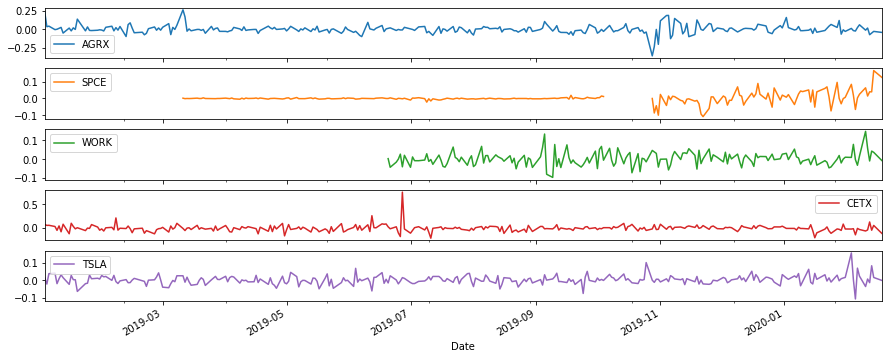

In [ ]:
# calPerChange = []
calPerChange.head()
calPerChange.plot(subplots=True, figsize=(15,6))

In [ ]:
corr = calPerChange.corr()
corr

Symbols,AGRX,SPCE,WORK,CETX,TSLA
Symbols,,,,,
AGRX,1.000000,0.070598,0.023858,0.059532,0.036939
SPCE,0.070598,1.000000,0.063959,0.020090,0.231177
WORK,0.023858,0.063959,1.000000,-0.053147,0.012853
CETX,0.059532,0.020090,-0.053147,1.000000,0.086999
TSLA,0.036939,0.231177,0.012853,0.086999,1.000000


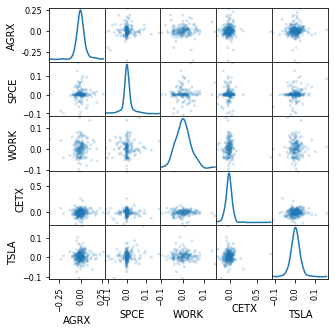

In [ ]:
scatter_matrix(calPerChange, diagonal='kde', alpha=0.2, figsize=(5, 5));

Text(0, 0.5, 'Returns SRRA')

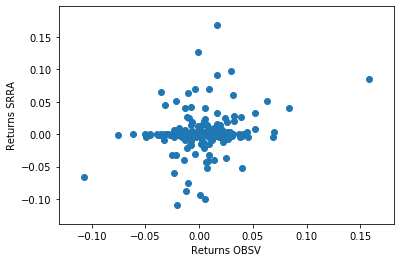

In [ ]:
plt.scatter(calPerChange.TSLA, calPerChange.SPCE)
plt.xlabel('Returns OBSV')
plt.ylabel('Returns SRRA')

Text(0, 0.5, 'Returns IBIO')

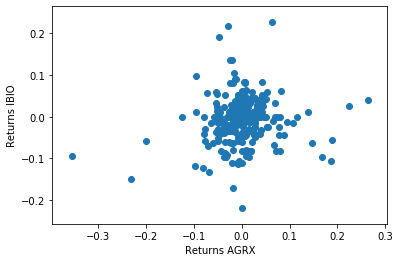

In [ ]:
#########################
# One outlier, remove
#########################

calPerChange2 = calPerChange[calPerChange.IBIO < 1]

plt.scatter(calPerChange2.AGRX, calPerChange2.IBIO)
plt.xlabel('Returns AGRX')
plt.ylabel('Returns IBIO')

In [ ]:
#########################
# some calculated values 
#########################

# calPerChange = (outDF.Close - outDF.Open)/outDF.Open
# calPerChange
# calPerChange = calPerChange.rename(columns={"IBIO": "PerChange"})
# list(outDF.columns) 

In [ ]:
# calPerChange.pivot_table(index='Date',columns='Stock',values='PerChange',aggfunc='sum').plot()

In [ ]:
#########################
# some calculated values 
#########################

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head()

Symbols,IBIO
Date,
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-08,NaN


In [ ]:
#########################
# join DF's 
#########################

dfMerge = df.merge(calPerChange, left_on = 'Date', right_on = 'Date')
# list(dfMerge.columns)
dfMerge.tail()

,"(Adj Close, IBIO)","(Close, IBIO)","(High, IBIO)","(Low, IBIO)","(Open, IBIO)","(Volume, IBIO)",PerChange
Date,,,,,,,
2019-12-23,0.250,0.250,0.2700,0.2300,0.25,6314800.0,0.000000
2019-12-24,0.240,0.240,0.2500,0.2300,0.25,1628200.0,-0.040000
2019-12-26,0.230,0.230,0.2400,0.2200,0.23,2195500.0,0.000000
2019-12-27,0.230,0.230,0.2400,0.2200,0.23,2795500.0,0.000000
2019-12-30,0.253,0.253,0.2625,0.2301,0.24,5165363.0,0.054167


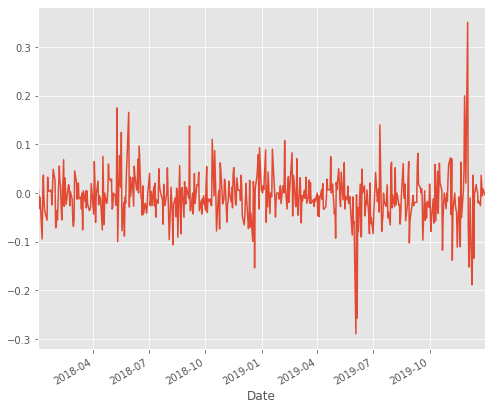

In [ ]:
#########################
# create Chart
# with Chart formatting
#########################

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# close_px.plot(label='AGRX')
# mavg.plot(label='Adj Close')
# plt.legend()

dfMerge.PerChange.plot()

In [ ]:
dfMerge.tail()

,"(Adj Close, SRRA)","(Close, SRRA)","(High, SRRA)","(Low, SRRA)","(Open, SRRA)","(Volume, SRRA)",PerChange
Date,,,,,,,
2019-12-23,0.3380,0.3380,0.347,0.3210,0.347,1525800,-0.025937
2019-12-24,0.3420,0.3420,0.344,0.3210,0.330,1177000,0.036364
2019-12-26,0.3400,0.3400,0.344,0.3300,0.342,1040700,-0.005848
2019-12-27,0.3400,0.3400,0.345,0.3310,0.337,1350000,0.008902
2019-12-30,0.3388,0.3388,0.340,0.3253,0.340,1126159,-0.003529


In [ ]:
# Build forecast model 
# Score today, pick for tomorrow
# Place bets
# Monitor

In [ ]:
tickerSites_df

,sites,type
0,https://www.stockmonitor.com/sector/basic-mate...,basic-materials
1,https://www.stockmonitor.com/sector/communicat...,communication-services
2,https://www.stockmonitor.com/sector/consumer-c...,consumer-cyclical
3,https://www.stockmonitor.com/sector/energy/,energy
4,https://www.stockmonitor.com/sector/financial-...,financial-services
5,https://www.stockmonitor.com/sector/healthcare/,healthcare
6,https://www.stockmonitor.com/sector/industrials/,industrials
7,https://www.stockmonitor.com/sector/technology/,technology
8,https://www.stockmonitor.com/sector/utilities/,utilities


In [ ]:
tickerSites_df['sites'][0]

'https://www.stockmonitor.com/sector/basic-materials/'

In [ ]:
# dfs = pd.read_html(tickerSites_df['sites'][0], header=0)


In [ ]:
# dfs

In [ ]:
# df = []

In [ ]:
df = []
dfs = pd.read_html(tickerSites_df['sites'][0], header=0)
for df in dfs:
    # print(df)
    df['type'] = tickerSites_df['type'][0]

In [ ]:
df

,Change%,Company,Company.1,Price,Volume,Low,High,type
0,▲ 2.23%,AEM,Agnico Eagle Mines Limited,70.220,16101,70.035,70.220,basic-materials
1,▲ 1.66%,APD,"Air Products and Chemicals, Inc",269.800,66611,268.420,270.110,basic-materials
2,▲ 2.73%,AGI,Alamos Gold Inc,9.040,60258,9.040,9.055,basic-materials
3,▲ 1.45%,ALB,Albemarle Corporation,136.525,38073,136.000,136.700,basic-materials
4,▲ 2.34%,AA,Alcoa Corporation,22.270,26989,22.140,22.270,basic-materials
...,...,...,...,...,...,...,...,...
101,▲ 0.90%,VMC,Vulcan Materials Company,136.660,7828,136.660,136.660,basic-materials
102,▲ 0.50%,WDFC,WD-40 Company,261.850,375,261.850,261.850,basic-materials
103,▲ 0.42%,WLK,Westlake Chemical Corporation,81.620,1634,81.620,82.100,basic-materials
104,▲ 1.51%,GRA,W. R. Grace & Co,54.570,1529,54.570,54.570,basic-materials


In [ ]:
tickerSites_df.shape[0]

9

In [ ]:
df = pd.read_html(tickerSites_df['sites'][0])

In [ ]:
df['type'] = tickerSites_df['type'][0]

In [ ]:
df_out.shape

(3636, 8)

In [ ]:
df_out

,Change%,Company,Company.1,Price,Volume,Low,High,type
0,▲ 2.10%,AEM,Agnico Eagle Mines Limited,70.135,75651,69.96,70.480,basic-materials
1,▲ 1.50%,APD,"Air Products and Chemicals, Inc",269.370,117050,268.42,270.350,basic-materials
2,▲ 3.52%,AGI,Alamos Gold Inc,9.110,308026,9.04,9.110,basic-materials
3,▲ 0.38%,ALB,Albemarle Corporation,135.080,127882,135.08,137.650,basic-materials
4,▲ 1.98%,AA,Alcoa Corporation,22.190,467655,22.09,22.525,basic-materials
...,...,...,...,...,...,...,...,...
84,▲ 0.43%,UGI,UGI Corporation,35.130,24620,34.94,35.145,utilities
85,▼ -0.09%,UTL,Unitil Corporation,42.520,1068,42.52,42.820,utilities
86,▲ 0.36%,VST,Vistra Energy Corp,18.205,125726,18.16,18.280,utilities
87,▲ 0.46%,WEC,"WEC Energy Group, Inc",92.000,73621,91.22,92.170,utilities


In [ ]:
df_out[df_out['Company'] == 'TSLA']

,Change%,Company,Company.1,Price,Volume,Low,High,type
333,▲ 0.48%,TSLA,"Tesla, Inc",642.93,6050556,634.73,646.83,consumer-cyclical


In [ ]:
df.head(5)

,Change%,Company,Company.1,Price,Volume,Low,High,type
0,▲ 4.42%,VNET,"21Vianet Group, Inc",29.885,2154424,28.640,30.340,sector/utilities
1,▲ 4.44%,DDD,3D Systems Corporation,10.340,1649841,10.090,10.450,sector/utilities
2,▼ -4.25%,EGHT,"8x8, Inc",30.045,4352316,28.845,30.280,sector/utilities
3,▼ -6.52%,JFU,9F Inc,1.290,1527916,1.230,1.330,sector/utilities
4,▲ 2.45%,ATEN,"A10 Networks, Inc",8.145,725864,8.040,8.275,sector/utilities
